| Problem | Formula|Search Domain|
|---      |----    |----|
|TKLY1|${\text{Minimum}}={\begin{cases}f_{1}\left(x_1\right)=x_1\\f_{2}\left(x_1,x_2,x_3,x_4\right)={\frac{1}{x_i}\Pi_{i=2}^{4}[2.0-exp(-(\frac{x_i-0.1}{0.004})^2)-0.8exp(-(\frac{x_i-0.9}{0.4})^2)]}\end{cases}}$|None|$0.1\leq{x_1}\leq1\\0\leq{x_2,x_3,x_4}\leq1$ |

In [1]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    nadir_point = np.max(F,axis=0)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    #final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)
    final_result = final_result[['Problem', 'Objectives', 'n_variables', 'pf_shape', 
            'hv', 'igd_plus','nadir_point', 
            'data_point_shape', 
            'path', 'image_location', 
            'hv_exc_time', 'ref_point']]
    print(f'ref_point is {ref_point}')
    return final_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# TKLY1 problem 
## - (#variables / #objectives)
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [2]:
pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
folder_2 = os.path.dirname(folder)
folder_2
filename = 'Random_Search_Result'
path = os.path.join(folder, filename)

result = pd.read_csv(path)
result['path'] = result['path'].str[39:]
result['image_location'] = result['image_location'].str[39:]
result = result.drop(columns=['xl','xu'])

def nadir_get(result_cc):
    path = os.path.join(folder_2,result_cc)
    F = np.loadtxt(path)
    if np.ndim(F) ==1:
        return F
    else: 
        nadir_point = np.max(F,axis=0)
        return nadir_point


result.loc[:,'nadir_point'] = result['path'].apply(nadir_get)
tkly1 = result.loc[result['Problem']=='TKLY1'].reset_index(drop=True)

print(f"The number of records {len(tkly1)}")

The number of records 13


In [3]:
#path and image path indicating location of objective file and visualization file
tkly1.iloc[:,-2:].head(5)

,image_location,nadir_point
0,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,"[0.789248729601476, 36.38638120295239]"
1,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,"[1.0782195331848892, 40.958273914068634]"
2,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,"[1.0085325391299966, 28.48671787969344]"
3,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,"[1.065445401154932, 19.364826251739103]"
4,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,"[1.0587349664643995, 55.949511004029524]"


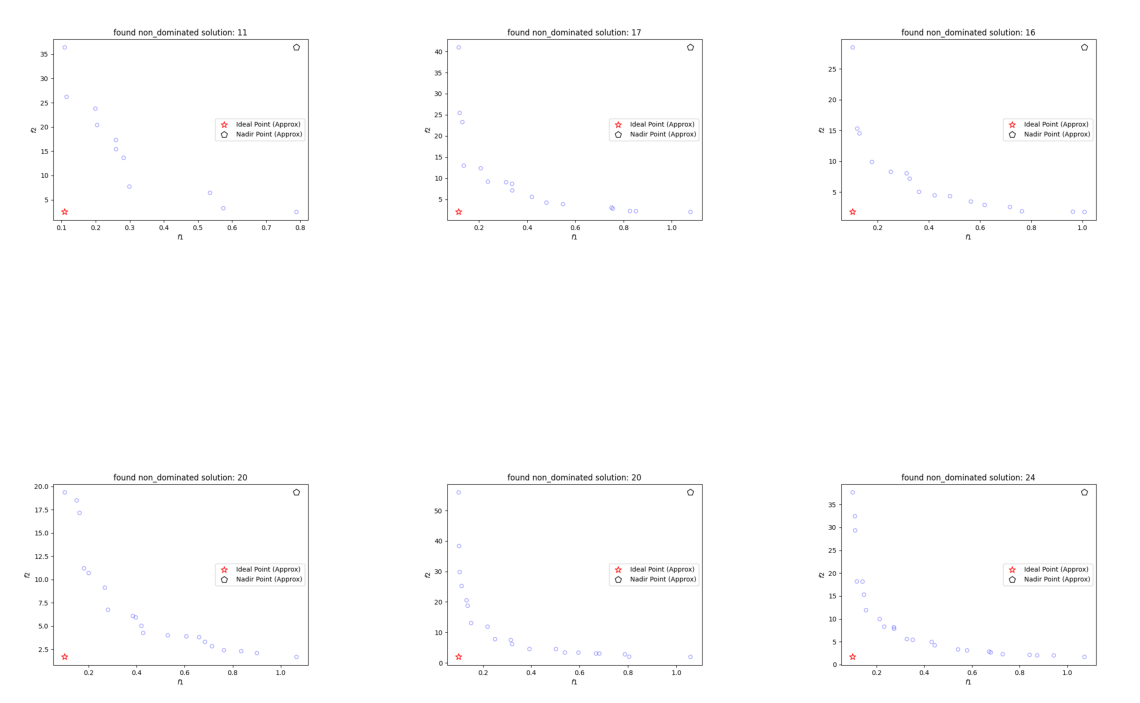

In [4]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,9),dpi=120)
for i in range(6):
    plt.subplot(2,3,i+1)
    f = tkly1['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)

    plt.axis('off')
    plt.imshow(img)

In [6]:

nadir_arr  = np.array([i for i in np.array(tkly1['nadir_point'])])

print(np.round(np.max(nadir_arr, axis=0)))
ref_point = np.array([ 1 ,56])

pf = np.loadtxt(os.path.join(cdir, 'Bench/tkly1_pf' ))
tkly1_table_1=  hv_result(tkly1)
tkly1_table_1

[ 1. 56.]
ref_point is [ 1 56]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,TKLY1,2,4,11,42.3441567,0.3847344,"[0.789248729601476, 36.38638120295239]",100,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.6...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0009742,[ 1 56]
1,TKLY1,2,4,17,44.1682854,0.3025011,"[1.0782195331848892, 40.958273914068634]",200,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.f...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0007269,[ 1 56]
2,TKLY1,2,4,16,45.3106058,0.2164847,"[1.0085325391299966, 28.48671787969344]",300,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.0...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0006948,[ 1 56]
3,TKLY1,2,4,20,45.0049117,0.2585429,"[1.065445401154932, 19.364826251739103]",500,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.9...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0023122,[ 1 56]
4,TKLY1,2,4,20,44.9563973,0.2432961,"[1.0587349664643995, 55.949511004029524]",600,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.9...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0017610,[ 1 56]
5,TKLY1,2,4,24,45.2964567,0.2122688,"[1.0721173297011866, 37.64554284040558]",1000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.d...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0011261,[ 1 56]
6,TKLY1,2,4,34,45.9796852,0.1681985,"[0.9969655033244346, 27.473084101867236]",3000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.8...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0012581,[ 1 56]
7,TKLY1,2,4,54,46.1136097,0.1706738,"[1.0917697762445118, 45.43778404974912]",6000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.5...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0020700,[ 1 56]
8,TKLY1,2,4,42,46.3693177,0.1306501,"[1.0921536338580786, 41.166955161913485]",10000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.d...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0027699,[ 1 56]
9,TKLY1,2,4,63,46.3212443,0.1399029,"[1.0015879179993235, 41.58794742157735]",15000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.9...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0043950,[ 1 56]


In [7]:
ref_point = np.array([5 ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/tkly1_pf' ))
tkly1_table_2 = hv_result(tkly1)
tkly1_table_2

ref_point is [5 5]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,TKLY1,2,4,11,10.9337899,0.3847344,"[0.789248729601476, 36.38638120295239]",100,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.6...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0008378,[5 5]
1,TKLY1,2,4,17,12.9428594,0.3025011,"[1.0782195331848892, 40.958273914068634]",200,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.f...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0009952,[5 5]
2,TKLY1,2,4,16,14.0853741,0.2164847,"[1.0085325391299966, 28.48671787969344]",300,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.0...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0008562,[5 5]
3,TKLY1,2,4,20,14.2811347,0.2585429,"[1.065445401154932, 19.364826251739103]",500,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.9...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0009992,[5 5]
4,TKLY1,2,4,20,13.3679359,0.2432961,"[1.0587349664643995, 55.949511004029524]",600,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.9...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0009501,[5 5]
5,TKLY1,2,4,24,14.4863444,0.2122688,"[1.0721173297011866, 37.64554284040558]",1000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.d...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0013330,[5 5]
6,TKLY1,2,4,34,15.3251774,0.1681985,"[0.9969655033244346, 27.473084101867236]",3000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.8...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0014701,[5 5]
7,TKLY1,2,4,54,14.9233488,0.1706738,"[1.0917697762445118, 45.43778404974912]",6000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.5...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0022101,[5 5]
8,TKLY1,2,4,42,16.0842605,0.1306501,"[1.0921536338580786, 41.166955161913485]",10000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.d...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0015650,[5 5]
9,TKLY1,2,4,63,15.3415670,0.1399029,"[1.0015879179993235, 41.58794742157735]",15000,Result/Random_Search/TKLY1/TKLY1_Obj-2_Var-4.9...,Result/Images/Random_Search/TKLY1/TKLY1_Obj-2_...,0.0021679,[5 5]


## TKLY1 reference (2,15)

In [8]:
ref_point = np.array([ 2 ,15])
pf = np.loadtxt(os.path.join(cdir, 'Bench/tkly1_pf' ))
tkly1_table_3 = hv_result(tkly1)


ref_point is [ 2 15]


In [34]:
pd.concat([tkly1_table_1,tkly1_table_2,tkly1_table_3]).to_excel('Excel/Excel_Random/tkly1.xlsx', engine = 'xlsxwriter')